In [6]:


# Standard library imports


# Gymnasium & Minigrid imports


# Visualization imports
import matplotlib.pyplot as plt
import numpy as np

In [23]:
%store -r Q_table_correct_800

In [20]:
Q_table_1

array([[-2.35644707e+000, -1.21702595e+000, -1.45131501e+000],
       [-2.27794309e+000, -2.17218549e-001, -3.61423033e-001],
       [-1.19849886e+000, -2.86837748e+000, -2.07077974e+000],
       [-2.07786199e+000, -2.28373879e+000, -2.86357578e+000],
       [-2.53442557e+000, -2.24224389e+000, -2.22786406e+000],
       [-2.84842517e+000, -2.88643528e+000, -1.36476370e+000],
       [-2.22969485e+000, -2.00140771e+000, -2.07058353e+000],
       [-2.65089346e-001, -3.19129900e+000, -2.96130494e+000],
       [-3.62152150e+000, -3.34486567e+000, -2.95284640e+000],
       [-3.54980028e+000, -3.76841003e+000, -2.83342195e+000],
       [-3.54442390e+000, -2.93607256e+000, -2.64456298e+000],
       [-2.14453924e+000, -3.18973045e+000, -3.62142686e+000],
       [-2.17573719e+000, -2.95311759e+000, -2.19014970e+000],
       [-2.83709525e+000, -2.87076051e+000, -3.01426725e+000],
       [-3.01226569e+000, -2.07952615e+000, -3.37901938e+000],
       [-2.79530000e+000, -2.92770941e+000, -2.88839812

In [4]:

def state_index_to_position(state_idx):
    """Converts a scalar state index back into (x, y, direction)."""
    grid_width = 8
        
    direction = state_idx % 4
    linear_idx = state_idx // 4

    y, x = divmod(linear_idx, grid_width)  # Convert to (x, y)
        
    return x+1, y+1, direction

In [24]:
Q_table = Q_table_correct_800

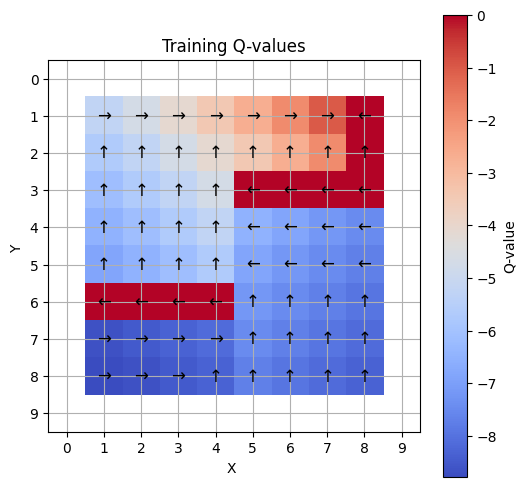

In [27]:
# Get grid dimensions
grid_width = 10
grid_height = 10

# Create an empty grid initialized with NaN (for visualization clarity)
q_values_grid = np.full((grid_height, grid_width), np.nan)
action_grid = np.full((grid_height, grid_width), -1)
# Get the max Q-value for each state (best action)
q_values = np.max(Q_table, axis=1)
best_actions = np.argmax(Q_table, axis=1) 
# Map Q-values to the grid using the state-to-position conversion
for i in np.arange(Q_table.shape[0]):
    x, y, _ = state_index_to_position(i)  # Get (x, y) from state
    q_values_grid[y, x] = q_values[i]  # Assign max Q-value to the corresponding (x, y)
    action_grid[y, x] = best_actions[i]

# Plot the Q-table grid
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Training Q-values')
plt.xticks(np.arange(grid_width))
plt.xlabel('X ')
plt.ylabel('Y ')
plt.yticks(np.arange(grid_height))
# plt.gca().invert_yaxis()  # To match grid layout
plt.grid(True)

# Annotate the grid with the best action
action_symbols = {0: "←", 1: "→", 2: "↑"}  # Mapping for visualization

for i in range(grid_height):
    for j in range(grid_width):
        if not np.isnan(q_values_grid[i, j]):  # Skip NaN values
            best_action = action_grid[i, j]
            action_symbol = action_symbols.get(best_action, "?")  # Default to "?" if unknown
            plt.text(j, i, f'{action_symbol}', ha='center', va='center', color='black', fontsize=12)

plt.show()


In [8]:
# Map Q-values to the grid using the state-to-position conversion
for i in np.arange(Q_table.shape[0]):
    x, y, _ = state_index_to_position(i)  # Get (x, y) from state
    q_values_grid[y, x] = q_values[i]  # Assign max Q-value to the corresponding (x, y)
